1. 如果 Pearson 的圖沒有規律，那就不用看 PC1 了，正確率會很低。
2. 因為 hic 的 Pearson 是對稱的，所以解釋變異量會很高，如果是沒有規律的圖解釋變異量會很低。

In [1]:
from hicpap import paptools
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
np.set_printoptions(threshold=10)
np.random.seed(3)

In [2]:
data_store="/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpap/data_store"

In [3]:
def generate_pearson(n:int):
    # Create a nxn array with random positive values
    matrix_np = np.abs(np.random.randn(n, n) * 10)  # Use absolute values for positive entries
    # Make the array symmetric
    matrix_np = matrix_np + matrix_np.T

    pearson_np = np.corrcoef(matrix_np)
    # Subtract the mean of each row to center the data
    return pearson_np 

pearson_np = generate_pearson(n=250)

Calculate PC1

In [4]:
Vh, explained_variances, total_entry_num, valid_entry_num = paptools.pca_on_pearson(pearson_np=pearson_np)
pc1_np = Vh[0]
print(f"Length of pc1_np: {len(pc1_np)}")
print(f"pc1_np: {pc1_np}")
print(f"pc1 explained_variance: {explained_variances[0]}")

Length of pc1_np: 250
pc1_np: [ 0.06063 -0.0888   0.03239 ... -0.07094  0.07062 -0.01218]
pc1 explained_variance: 0.02875889141283014


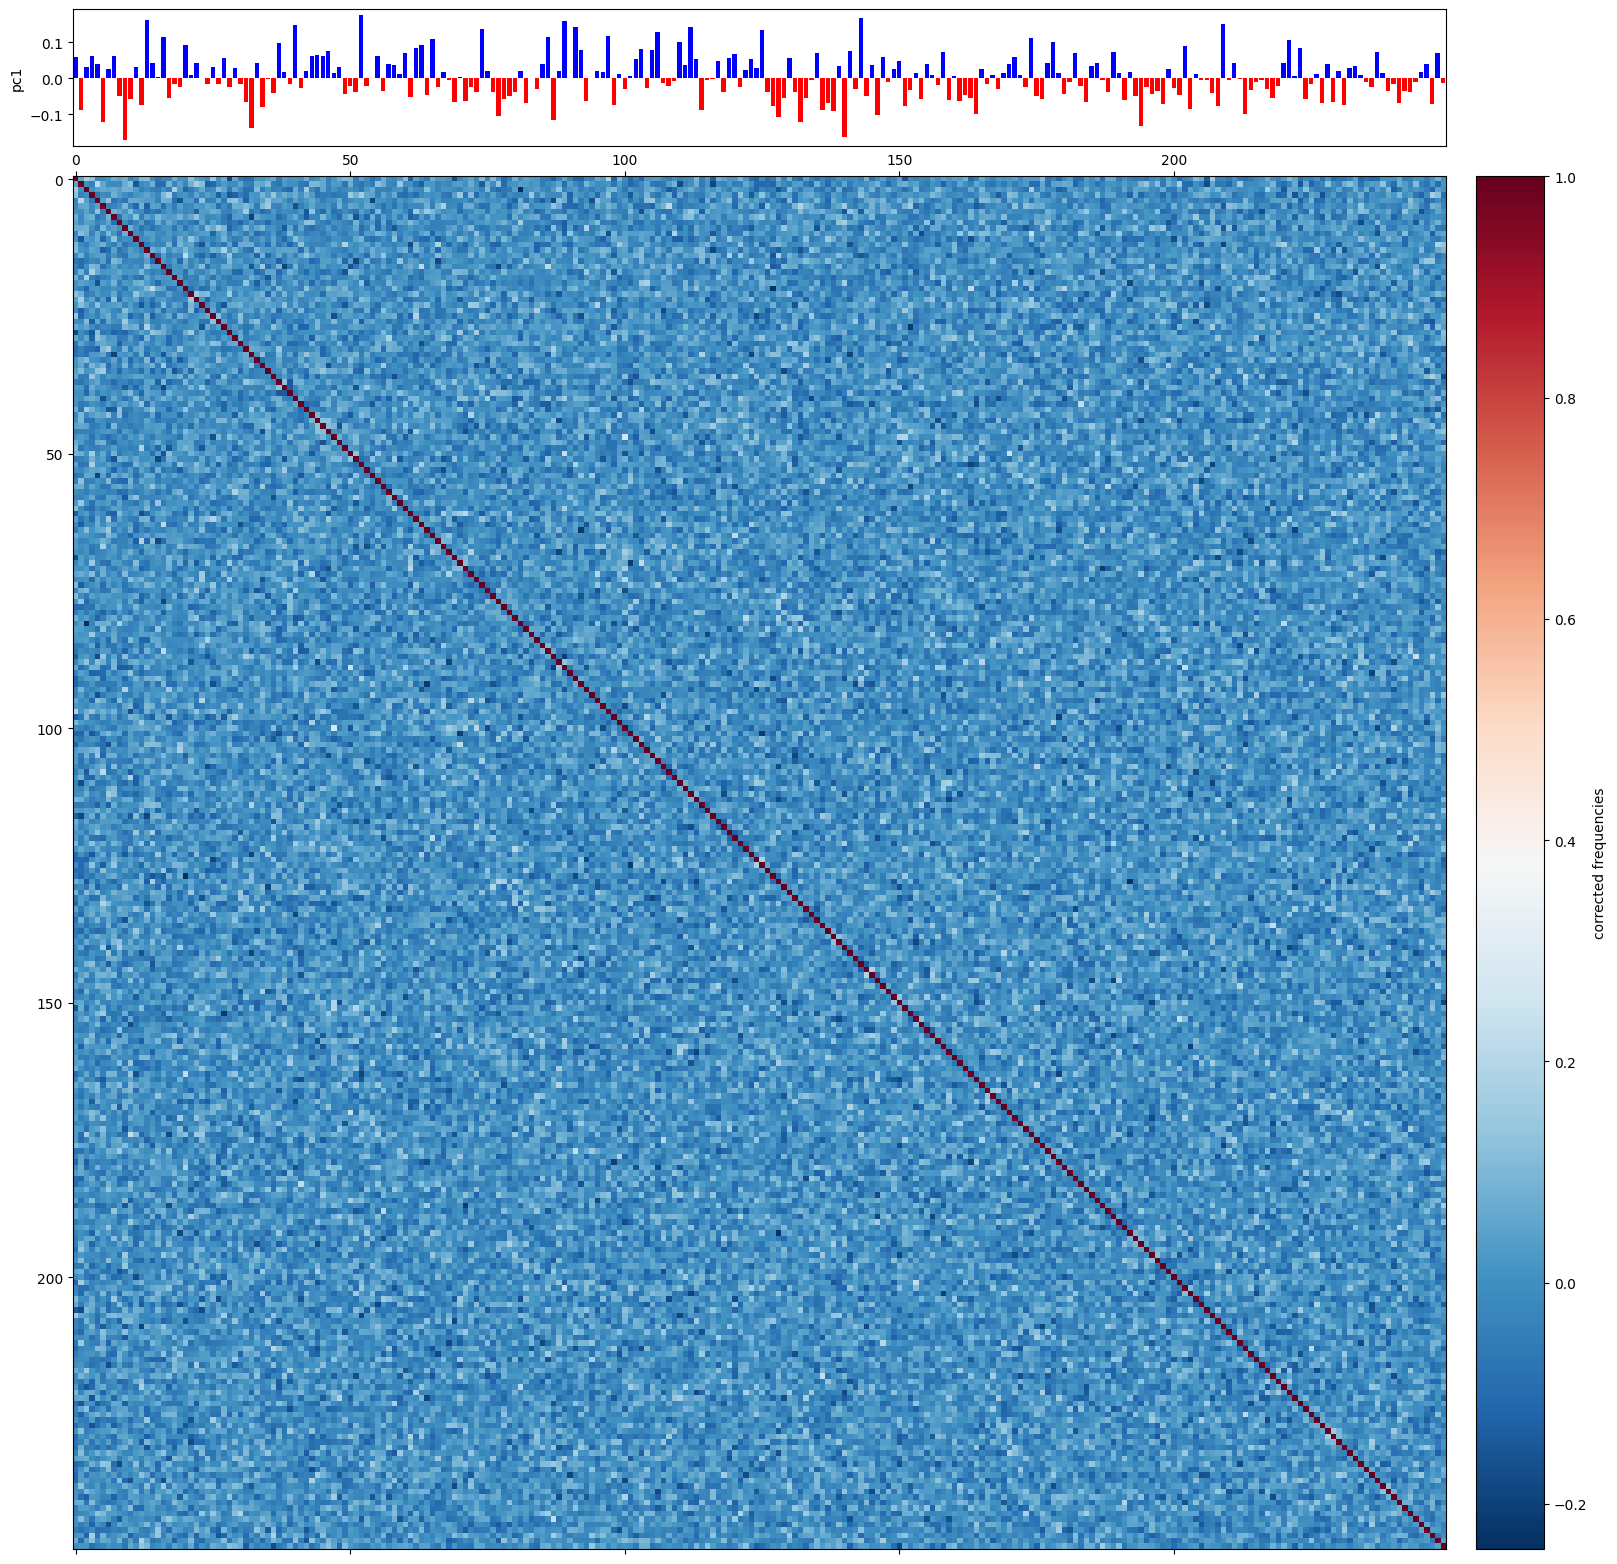

In [5]:
f, ax = plt.subplots(
    figsize=(20, 20),
)
im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(im, cax=cax, label='corrected frequencies')

#### Settings for pc1_np
ax1 = divider.append_axes("top", size="10%", pad=0.3, sharex=ax)
pc1_x_axis = [i for i in range(0, len(pc1_np))]
pc1_bar_color = ['b' if i > 0 else 'r' for i in pc1_np]
ax1.bar(x=pc1_x_axis, height=pc1_np, color=pc1_bar_color)
ax1.set_ylabel('pc1')
ax1.xaxis.set_visible(False)

In [6]:
del f, im, ax, ax1

In [7]:
pearson_np = paptools.read_pearson(
    pearson=f"{data_store}/data/rao_2014/juicer_outputs/gm12878/1000000/pearsons/pearson_chr1.txt",
    format="juicer"
)

Vh, explained_variances, total_entry_num, valid_entry_num = paptools.pca_on_pearson(pearson_np=pearson_np)
pc1_np = Vh[0]
print(f"Length of pc1_np: {len(pc1_np)}")
print(f"pc1_np: {pc1_np}")
print(f"pc1 explained_variance: {explained_variances[0]}")

Length of pc1_np: 250
pc1_np: [-0.02408  0.07592  0.04868 ... -0.0633  -0.08301 -0.06244]
pc1 explained_variance: 0.8449300048084089


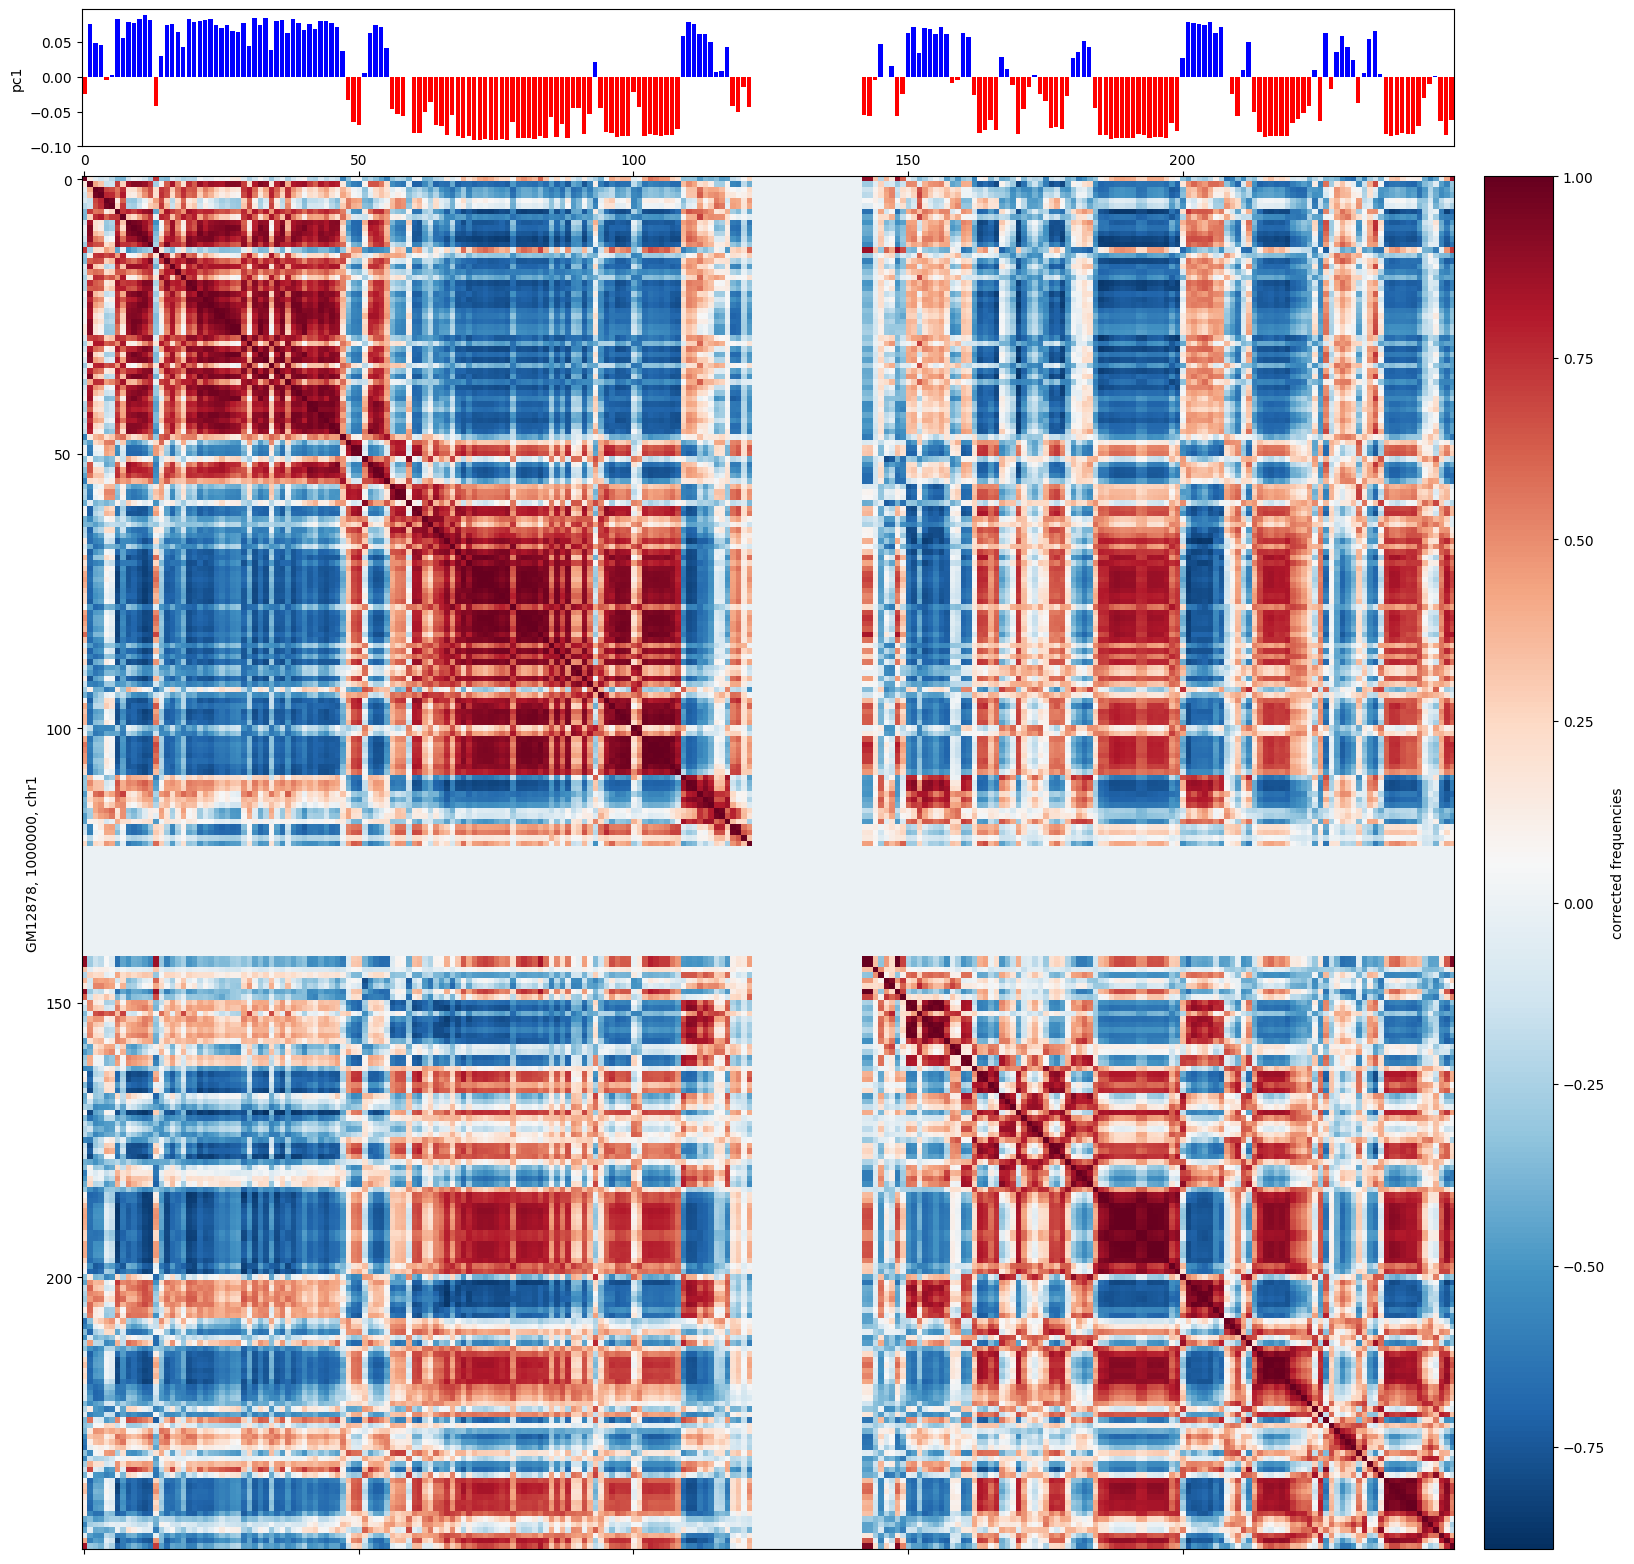

In [8]:
# Settings for pearson_np
f, ax = plt.subplots(
    figsize=(20, 20),
)

im = ax.matshow(
    pearson_np,
    cmap='RdBu_r',
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
plt.colorbar(im, cax=cax, label='corrected frequencies')
ax.set_ylabel(f'GM12878, 1000000, chr1')

#### Settings for pc1_np
ax1 = divider.append_axes("top", size="10%", pad=0.3, sharex=ax)
pc1_x_axis = [i for i in range(0, len(pc1_np))]
pc1_bar_color = ['b' if i > 0 else 'r' for i in pc1_np]
ax1.bar(x=pc1_x_axis, height=pc1_np, color=pc1_bar_color)
ax1.set_ylabel('pc1')
ax1.xaxis.set_visible(False)